# Astrophysical Scene Construction

The first step in any PanCAKE simulation is to define the astrophysical scenes that we want to simulate observations for. Theoretically, Scenes can be as large as desired, or include any number of astrophysical sources. However, only objects within the simulated field of view will have an effect on the simulation results. 

In the [Basic Tutorial](https://aarynncarter.com/PanCAKE/notebooks/pancake_basic_tutorial.html) we covered a simple example of this, however there exist a variety of different ways to construct and visualise these scenes further.

Important - If you are running PanCAKE within a python script, you will need to place all imports and function calls within the following statement:

## The Basics

The scenes we want to include in a simulation should be independently intialised using `pancake.scene.Scene()`. Ideally, a string descriptor of the scene should also be provided for future clarity in simulation FITS headers, although this is not mandatory. In this case we have created two scenes, one for our "Target" (for science observations) and one for our "Reference" (for PSF subtraction). 

In [1]:
import pancake

target = pancake.scene.Scene('Target')
reference = pancake.scene.Scene('Reference')

## Adding Sources

Now that the scenes we need have been created, we can start to add astrophysical sources to them as desired. Those with previous experience will notice that this is almost identical to the scene construction in the official JWST Exposure Time Calculator (Pandeia). This is by design, and simply allows PanCAKE to interface easily with Pandeia, without requiring and unnecessary amount of user inputs. 

### SIMBAD Query

The simplest way to add a source to a scene is using a query to [SIMBAD](http://simbad.u-strasbg.fr/simbad/):

In [2]:
target.add_source('HIP 65426', kind='simbad')

Target // Adding Source: HIP 65426


In this case, all we needed to do was provide a SIMBAD compatible string identifier for the object we wish to observe, and let PanCAKE know that we want to use SIMBAD to get all the relevant information with the `kind` property. 

Here we can see that we have a few warnings. For the vast majority of SIMBAD objects, the magnitudes are reported in Vega magnitudes, so the first warning isn't a concern for us. However, the second will slightly impact our future simulations. PanCAKE uses the SIMBAD spectral type for the provided object to estimate a matching spectrum of that object from the synphot database. This database is not complete across spectral types, and therefore in some cases the closest matching spectral type with a spectrum will be used instead. The extent of this approximation should be assessed on a case-by-case basis, depending on the difference between the true and approximated spectral type, in addition to the filter an observation is being performed under. 

### Stellar Grid

We can also add a source to our scenes by drawing directly from the synphot database, making using of the Phoenix stellar model grid:

In [3]:
reference.add_source('HIP 68245', kind='grid', spt='b2iv', norm_val=4.491, norm_unit='vegamag', norm_bandpass='2mass_ks')

Reference // Adding Source: HIP 68245


Here the `kind` property has been adjusted to use the stellar grid, and more user input is required on the spectral type of the object, in addition to parameters necessary to correctly normalise the retrieved spectrum. The normalisation bandpass can be any 2MASS, WISE, Bessel, Johnson, or JWST filter (see list at the bottom of this page). 

Note that a name still needs to be provided for the source, this is for bookkeeping purposes and improves the clarity of the simulation FITS headers. 

### User Input Spectrum

The two above methods are convenient ways to add stellar objects to a scene, however, in some cases more precision is necessary, or non-stellar objects need to be included within a scene. In such a case, the remaining method is to add the source through a user input file of its spectrum:

In [4]:
input_file = './hip65426b_bestfit_jansky.txt'
target.add_source('HIP 65426b', r=0.83, theta=150, kind='file', filename=input_file, wave_unit='micron', flux_unit='Jy')

Target // Adding Source: HIP 65426b


Again, the `kind` property is adjusted to let PanCAKE know what to do, and relevant properties are provided to the `add_source` function. In this case, we have provided an input file with two columns of format wavelength and flux, alongside the units of the column values. A range of different units are supported, with the [synphot units](https://synphot.readthedocs.io/en/latest/synphot/units.html) webpage outlining the vast majority. 

This time, we have added a source representing the companion HIP 65426 b. Thus far, all of our sources have been automatically located at the center of the observational scene. However, in this case we want to place this companion relative to its host star, and have provided `r`/`theta` values to define its location.  

### Extended Sources

Unfortunately, at present PanCAKE does not offer any way to include extended sources such as disks in the constructed astrophysical scenes. If you are particularly interested in such a feature, I am very much open to collaboration and would be more than happy to support any efforts to extend PanCAKE's functionality. 

## Scene Visualisation

To check that your scenes have been constructed correctly, both spatially and spectrally, PanCAKE also includes two plotting functions to help visualise a scene. 

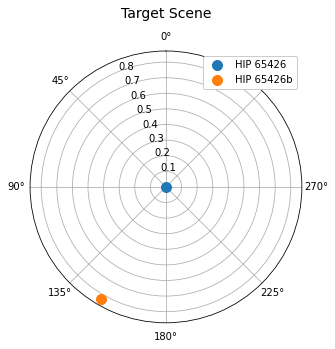

In [5]:
target.plot_scene(title='Target Scene')

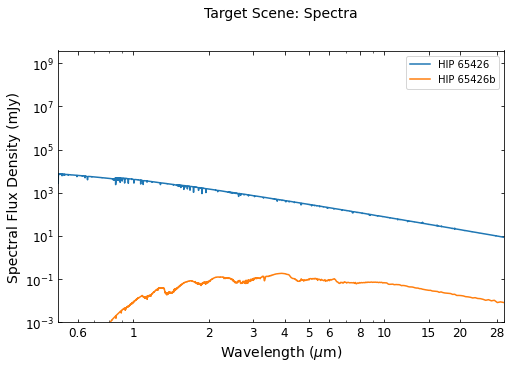

In [6]:
target.plot_source_spectra(title='Target Scene: Spectra')

## Modifying Scenes

In some cases it will be necessary to modify the sources within a Scene after it is created. To aid this, there are a selection of functions that can be used the move sources spatially, or renormalise an individual sources spectrum.

### Spatial Adjustments

All the sources within a given scene can be offset in x-y space, or rotated about a chosen center. Offsets should be specified in x, y distances in arcseconds, and rotations should be specified in degrees. A rotation direction can also be specified, but the default is to rotate counter-clockwise. 

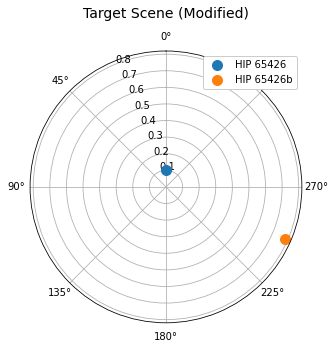

In [7]:
target.offset_scene(0.1, 0.0)
target.rotate_scene(90, direction='counter_clockwise')
target.plot_scene(title='Target Scene (Modified)')

### Spectral Adjustments

An individual source within a scene can be renormalised base on input normalisation parameters if necessary. 

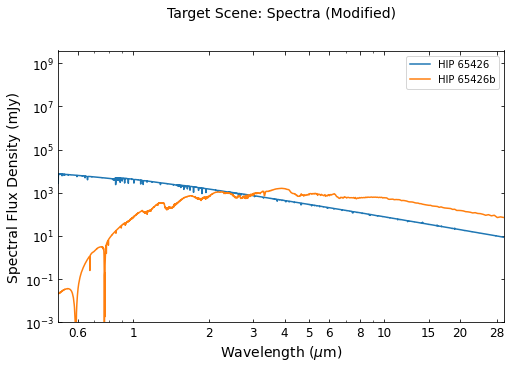

In [8]:
target.renormalise_source('HIP 65426b', norm_val=1e3, norm_unit='mJy', norm_bandpass='2mass_ks')
target.plot_source_spectra(title='Target Scene: Spectra (Modified)')

## Ancilliary Information

### Compatible normalisation bandpasses:

2mass_j, 2mass_h, 2mass_ks, wise_w1, wise_w2, wise_w3, wise_w4, bessel_j, bessel_h, bessel_k, cousins_r, cousins_i, johnson_u, johnson_b, johnson_v, johnson_r, johnson_i, johnson_j, johnson_k, f070w, f090w, f115w, f140m, f150w, f150w2, f162m, f164n, f182m, f187n, f200w, f210m, f210m_nd, f212n, f250m, f277w, f300m, f322w2, f323n, f335m, f335m_nd, f356w, f360m, f405n, f410m, f430m, f444w, f460m, f466n, f470n, f480m, wlp4, f1065c, f1140c, f1550c, f2300c, f560w, f770w, f1000w, f1130w, f1280w, f1500w, f1800w, f2100w, f2550w, fnd